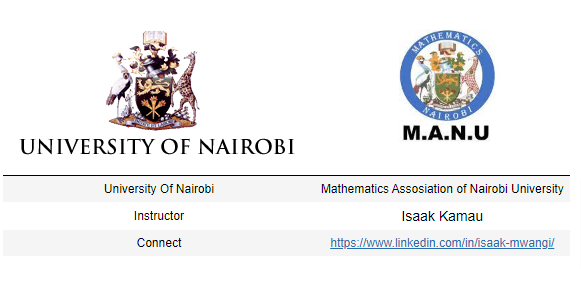

# Data Visualization

You've learned to use `NumPy` and `Pandas` to read and manipulate your data from a statistical and mathematical standpoint. Now, you'll visualize your data in the form of graphs/charts, to get insights that the statistics alone may not completely convey.

The current and the next lesson will help you learn to draw a variety of informative statistical visualizations using the `Matplotlib` and `Seaborn` packages.

The current lesson will focus on introducing univariate visualizations: bar charts, and histograms. By the end of this lesson, you will be able to:

   1. Create bar charts for qualitative variables, for example, the amount (number) of eggs consumed in a meal (categories: {breakfast, lunch, or dinner}). In general, bar chart maps categories to numbers.

   2. Create Pie charts. A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. A pie chart is preferably used when the number of categories is less, and you'd like to see the proportion of each category.

   3. Create histograms for quantitative variables. A histogram splits the (tabular) data into evenly sized intervals and displays the count of rows in each interval with bars. A histogram is similar to a bar chart, except that the "category" here is a range of values.

   4. Analyze the bar charts and histograms.

Once you have the foundational knowledge of Matplotlib and Seaborn, we will move on to the next lesson (`part-2`), where you'll learn advanced visualizations such as heat map, scatter plot, violin plots, box plots, clustered bar charts, and many others.


## What is Tidy Data?

In this course, it is expected that your data is organized in some kind of tidy format. In short, a tidy dataset is a tabular dataset where:

   1. each variable is a column
   2. each observation is a row
   3. each type of observational unit is a table



A __bar chart__ depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

## Bar Chart using Seaborn

A basic bar chart of frequencies can be created through the use of seaborn's countplot function.
```
    seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```
We will see the usage of a few of the arguments of the `countplot()` function.

#### Example 1. Create a vertical bar chart using Seaborn, with default colors

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


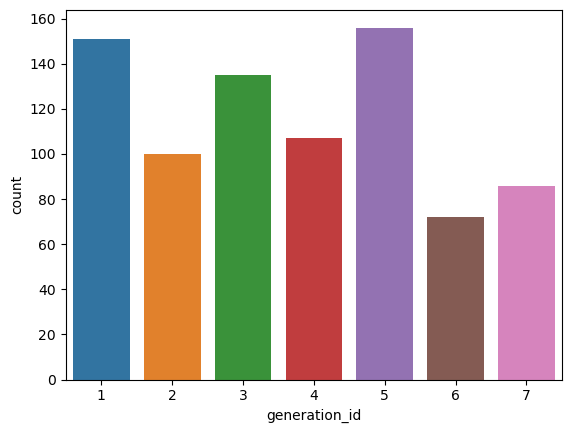

In [3]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');

In the example above, all the bars have a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. You can choose to have a uniform color across all bars, by using the `color` argument, as shown in the example below:

#### Example 2. Create a vertical bar chart using Seaborn, with a uniform single color

<Axes: xlabel='generation_id', ylabel='count'>

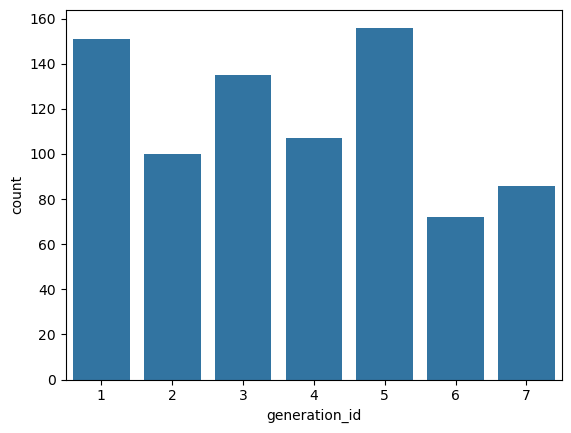

In [4]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color)

## Bar Chart using the Matplotlib

You can even create a similar bar chart using the Matplotlib, instead of Seaborn. We will use the `matplotlib.pyplot.bar()` function to plot the chart. The syntax is:
```
    matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)
```
Refer to the documentation for the details of optional arguments. In the example below, we will use `Series.value_counts()` to extract a Series from the given DataFrame object.

#### Example 3. Create a vertical bar chart using Matplotlib, with a uniform single color


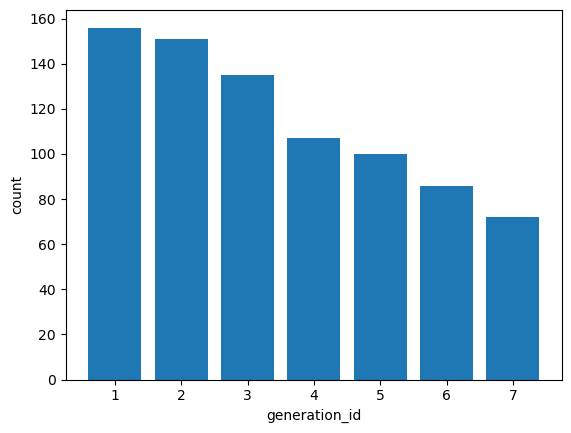

In [5]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts()

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

There is a lot more you can do with both Seaborn and Matplotlib bar charts. The remaining examples will experiment with seaborn's `countplot()` function.

For nominal-type data, one common operation is to sort the data in terms of frequency. In the examples shown above, you can even order the bars as desirable. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

This can be done by using the `order` argument of the `countplot()` function.
### Example 4. Static and dynamic ordering of the bars in a bar chart using `seaborn.countplot()`

<Axes: xlabel='generation_id', ylabel='count'>

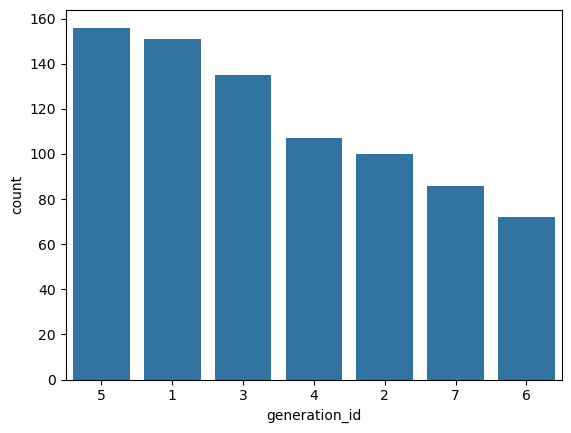

In [6]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series

freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order)

While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. For ordinal-type data, we probably want to sort the bars in order of the variables. The best thing for us to do in this case is to convert the column into an ordered categorical data type.

   >> Additional Variation - Refer to the `CategoricalDtype` to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

Should you find that you need to sort an ordered categorical type in a different order, you can always temporarily override the data type by setting the "order" parameter as above.

The category labels in the examples above are very small. In case, the category labels have large names, you can make use of the `matplotlib.pyplot.xticks(rotation=90)` function, which will rotate the category labels (not axes) counter-clockwise 90 degrees.
#### Example 5. Rotate the category labels (not axes)

<Axes: xlabel='type_1', ylabel='count'>

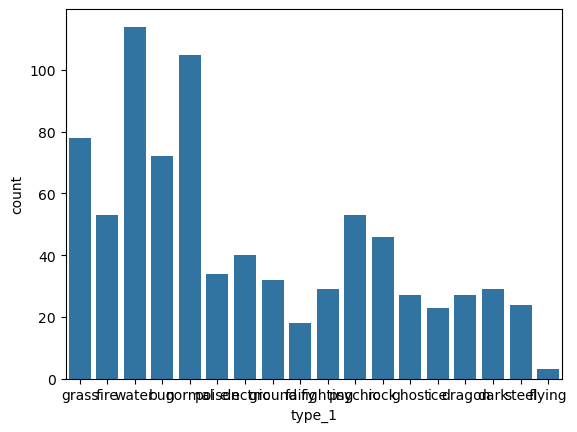

In [7]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color = base_color)

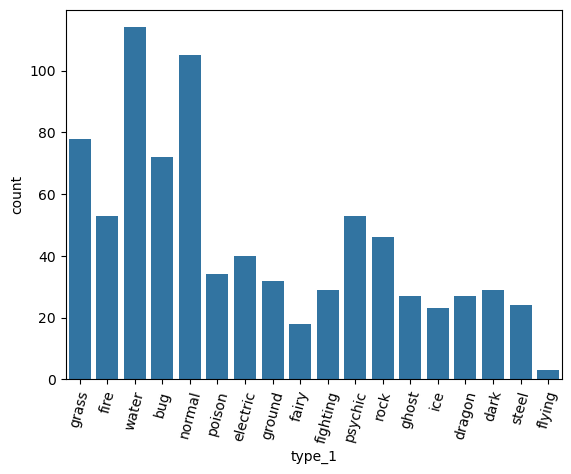

In [8]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color = base_color)

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=75);

Even after using the `matplotlib.pyplot.xticks(rotation=90)` function, if the category labels do not fit well, you can rotate the axes.

### Example 6. Rotate the axes clockwise

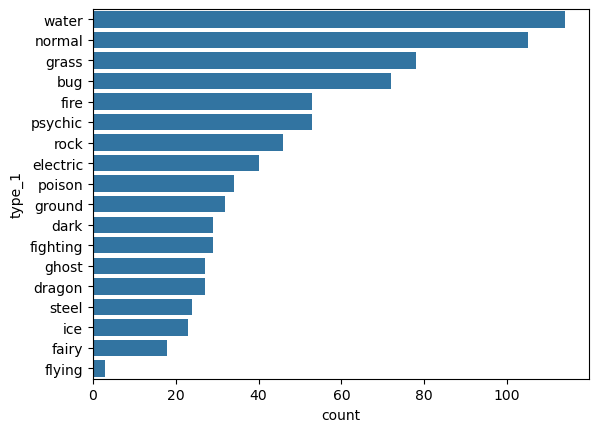

In [9]:
# Plot the Pokemon type on a Horizontal bar chart
order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=order);

# Pie Charts

A `__pie chart__` is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken. Use a Pie chart only when the number of categories is less, and you'd like to see the proportion of each category on a chart.

### Guidelines to Use a Pie Chart

If you want to use a pie chart, try to follow certain guidelines:

   1. Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
   2. Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
   3. Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

## Plot a Pie Chart
### `matplotlib.pyplot.pie()`

You can create a pie chart with matplotlib's `matplotlib.pyplot.pie()` function. A basic syntax is:
```
    matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)
```
This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes. Refer to the function syntax for details about all other arguments.

### `matplotlib.pyplot.axis()`

We also need to know about the `matplotlib.pyplot.axis()` function to set some axis properties. It optionally accepts the axis limits in the form of `xmin, xmax, ymin, ymax floats`, and returns the updated values.

   ` matplotlib.pyplot.axis(*args, emit=True, **kwargs)`

In the function above, the `*args` represents any number of arguments that you can pass to the function, whereas `**kwargs` stands for keyword arguments, generally passed in the form of a dictionary.

Refer to the function syntax for in-depth details on the all possible values of the arguments.

#### Example 1. Plot a simple Pie chart

(-1.099999741140388,
 1.0999975725922118,
 -1.0999974358356632,
 1.0999998778969364)

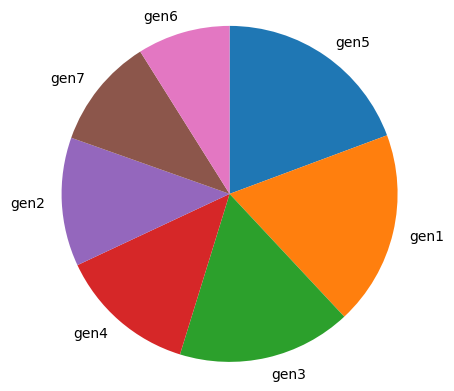

In [10]:
# Use the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, data=sorted_counts.index, startangle=90, counterclock=False, labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'])

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')

To follow the guidelines in the bullet points above, I include the "`startangle = 90`" and "`counterclock = False`" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. The axis function call and 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. Without this call, the pie could end up looking oval-shaped, rather than a circle.

___TO DO___

Did you notice the various arguments in the `plt.pie()` function? Particularly, the `labels = sorted_counts.index` argument represents a list of strings serving as labels for each wedge. In the example above, the labels have used the following list:

In [11]:
sorted_counts.index

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

# Donut Plot

A sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

To create a donut plot, you can add a `wedgeprops` argument to the `pie` function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

#### Example 2. Plot a simple Donut plot

(-1.099999741140388,
 1.0999975725922118,
 -1.0999974358356632,
 1.0999998778969364)

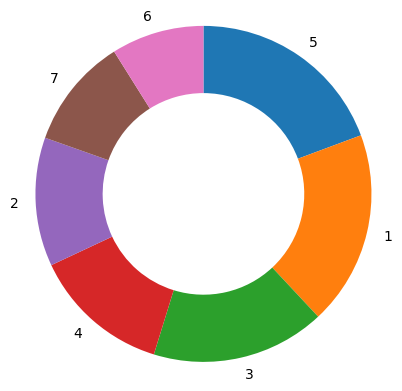

In [11]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

# Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms. There is a mild variation in the specifics, such as plotting gaussian-estimation line along with bars in Seabron's distplot(), and the arguments that you can use in either case.


### Matplotlib.pyplot.hist()

You can use the default settings for matplotlib's `hist()` function to plot a histogram with 10 bins:

#### Example 1. Plot a default histogram

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


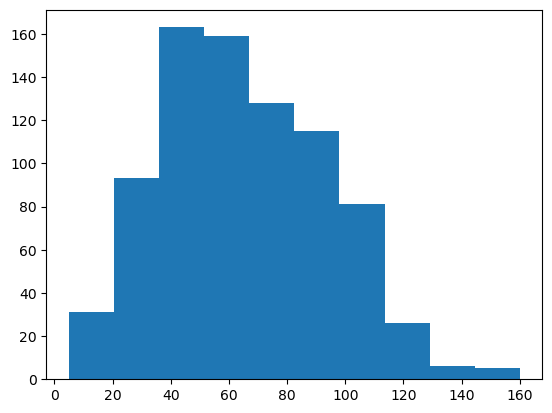

In [14]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data=pokemon, x='speed');

#### Assignment : Checkout on how to make gaps between the histogram bars

## Scatterplots

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the `scatterplot`. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

### matplotlib.pyplot.scatter()

One basic way of creating a scatterplot is through Matplotlib's `scatter` function:

#### Example 1 a. Scatter plot showing negative correlation between two variables

In [15]:
# TO DO: Necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [12]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(10)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

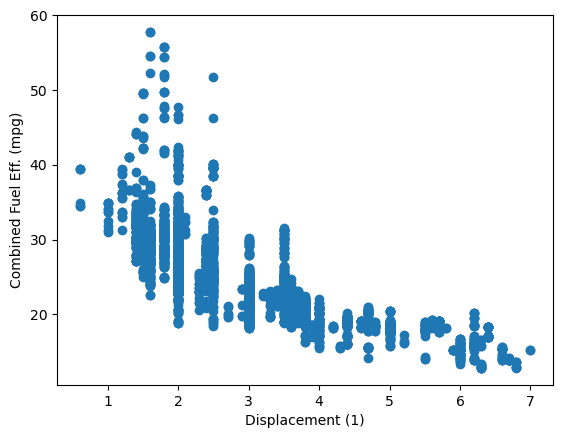

In [13]:
# Scatter plot
plt.scatter(data=fuel_econ, x='displ', y='comb')

plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

### Alternative Approach - seaborn.regplot()

Seaborn's `regplot()` function combines scatterplot creation with regression function fitting:

#### Example 1 b. Scatter plot showing negative correlation between two variables

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

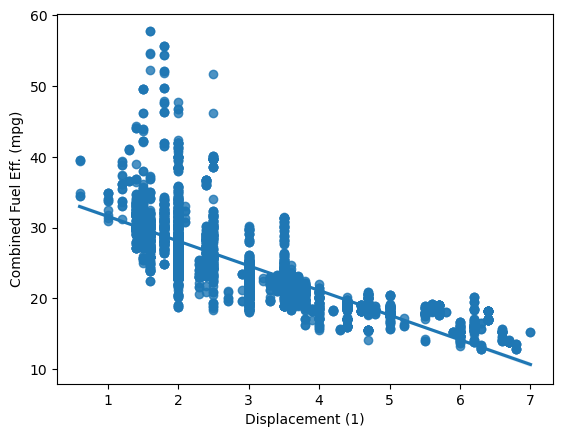

In [18]:
sb.regplot(data=fuel_econ, x='displ', y='comb')

plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

#### Example. Plot a Heat Map between two qualitative variables

One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function `heatmap()` is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.



#### Preparatory Step 1 - Add a new column for transmission type - Automatic or Manual

In [20]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


### Step 2 - Get the data into desirable format - a DataFrame

In [21]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Compact Cars      Automatic     784
                  Manual        338
Large Cars        Automatic     605
                  Manual         20
Midsize Cars      Automatic     989
                  Manual        199
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
dtype: int64

In [22]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

In [23]:
ct_counts

,VClass,trans_type,count
0,Compact Cars,Automatic,784
1,Compact Cars,Manual,338
2,Large Cars,Automatic,605
3,Large Cars,Manual,20
4,Midsize Cars,Automatic,989
5,Midsize Cars,Manual,199
6,Minicompact Cars,Automatic,188
7,Minicompact Cars,Manual,133
8,Subcompact Cars,Automatic,502
9,Subcompact Cars,Manual,171


In [24]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

In [25]:
ct_counts

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


### Documentation: Series `reset_index`, `DataFrame pivot`

#### Step 2 - Plot the heatmap

<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

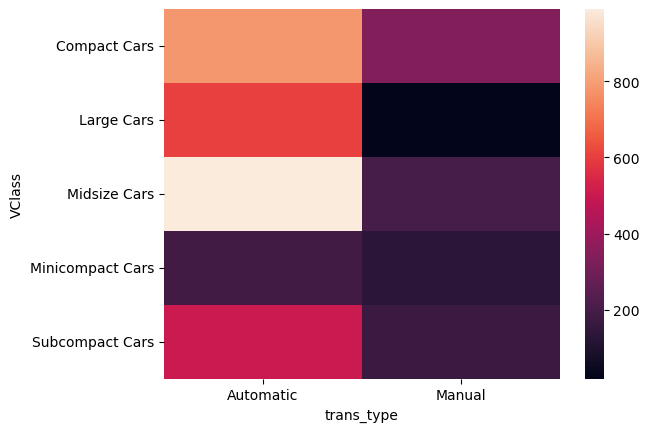

In [26]:
sb.heatmap(ct_counts)

#### Plot the bar chart

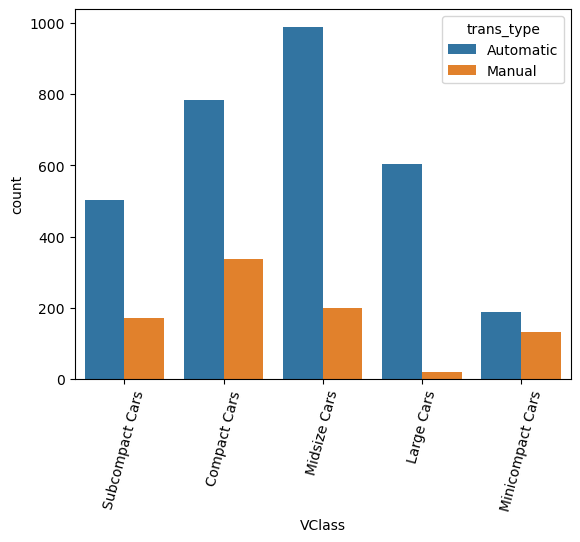

In [27]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation=75);

# Safaricom Financial Report
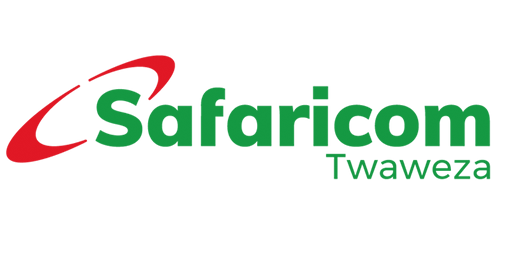

# A Simple Data Analyst Project

# Walmart Sales Analysis
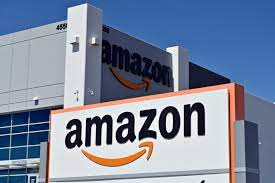

## Table of Contents

1. Import Necessary Libraries
2. Question 1:What was the best month for sales? How much was earned that month?
3. Question 2:What city sold the most product?
4. Question 3:What time should we display advertisemens to maximize the likelihood of customer’s buying product?
5. Question 4 : What products are most often sold together?
6. Question 5:What product sold the most? Why do you think it sold the most?


In [46]:
### Write an Introduction Here

In [ ]:
###Write a dataset description Here, Example:

#The file Sales.csv consists of Walmart's weekly sales from 2010-02-05 to 2012-11-01. The file has the following columns:
  #Price Each: The price of each commodity sold by the campany

    

In [6]:
#Import Necessary Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Read dataframe
df = pd.read_csv("Sales Data.csv")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.isna().sum() #shows that there are no null values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [10]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12


## Question 1: What was the best month for sales? How much was earned that month?

In [11]:
results = df.groupby('Month').sum()

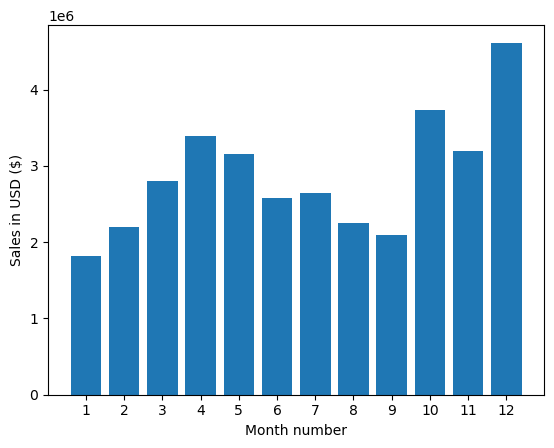

In [12]:
months=range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.show()

## Question 2:What city sold the most product?

In [13]:
city_sales=df.groupby('City')['Sales'].sum().nlargest(5)
city_sales

City
 San Francisco(CA)    8262203.91
 Los Angeles(CA)      5452570.80
 New York City(NY)    4664317.43
 Boston(MA)           3661642.01
 Atlanta(GA)          2795498.58
Name: Sales, dtype: float64

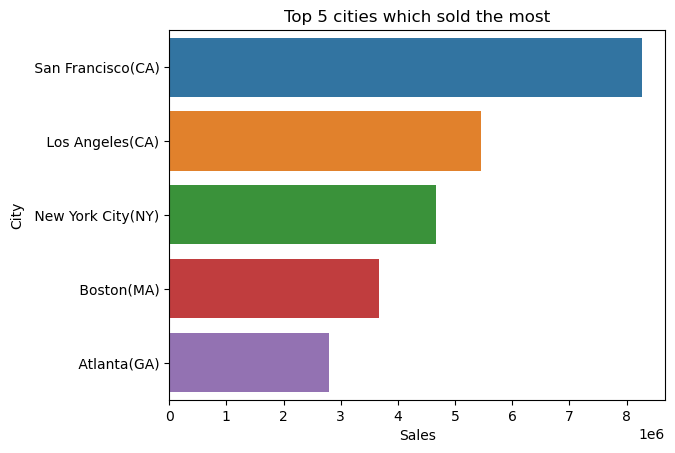

In [14]:
sns.barplot(y=city_sales.index,x=city_sales).set(title='Top 5 cities which sold the most' );

## Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [16]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12,38,1


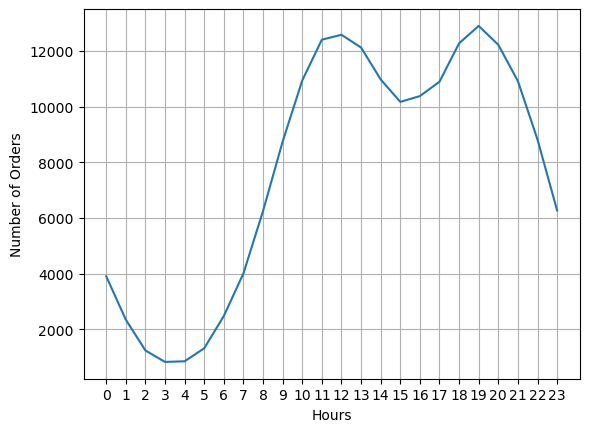

In [17]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

## My recommendation is slightly before 11am or 7pm

## Question 4 : What products are most often sold together?

In [40]:
df1 = df[df['Order Date'].duplicated(keep=False)]

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
df1.head()

C:\Users\Isaac\AppData\Local\Temp\ipykernel_12892\3608777777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable
9,295674,AAA Batteries (4-pack)
11,295676,ThinkPad Laptop


In [41]:
from itertools import combinations
from collections import Counter

In [42]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5:What product sold the most? Why do you think it sold the most?

In [43]:
product_group = df.groupby('Product')

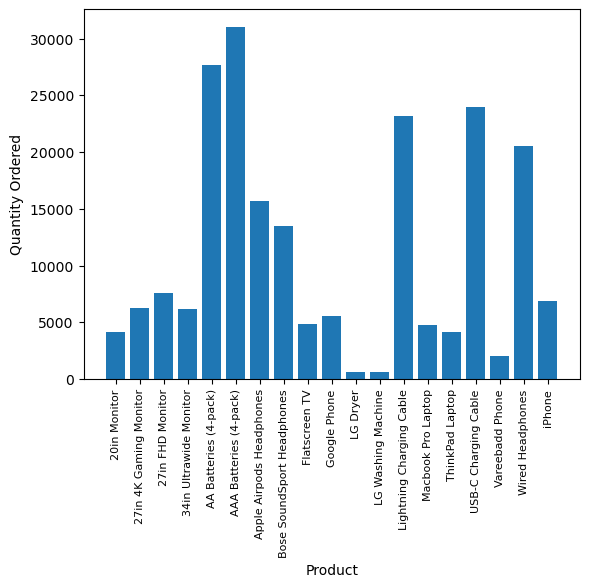

In [44]:
quantity_ordered =product_group.sum()['Quantity Ordered']

products = [product for product ,df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

C:\Users\Isaac\AppData\Local\Temp\ipykernel_12892\3129376150.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\Isaac\AppData\Local\Temp\ipykernel_12892\3129376150.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


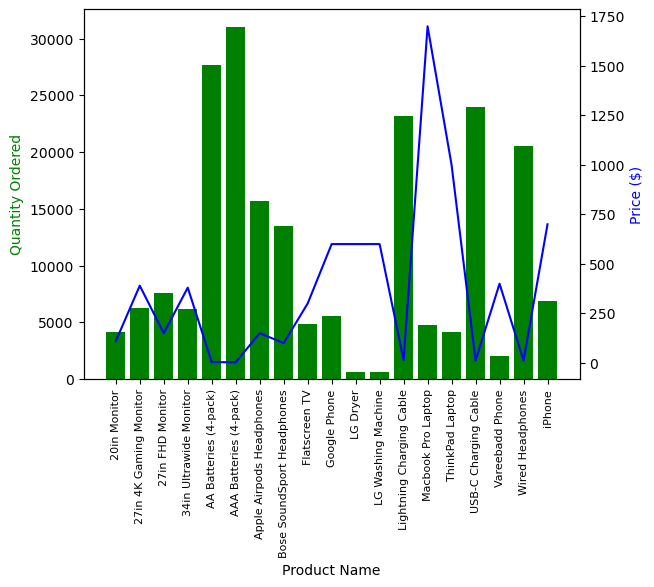

In [45]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products , prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

In [50]:
# Write your conclusions here #Example

#Our analysis shows that sales during holiday weeks are significantly higher than during non-holiday weeks, with
#sales doubling on average. Additionally, there is a strong seasonal component to the sales data. The average
#sales of the top performing stores are up to 500% higher than the lowest performing stores


In [ ]:
# Write some References: Might be some external links

# MANU DATA ANALYSIS WITH PYTHON FINAL PROJECT:

## STEP 1: Join a group of 5 people (Give the group a name)
## Step 2: Create a Whatsapp group for your group
## Step 3: Download any sales dataset from https://www.kaggle.com/datasets
## Step 4: Analyize/clean/visualize the data and write a full report
## Step 5: Post your project in your Github.com 
## Step 6: Review two other groups projects and give them a feedback